In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [25]:
from tensorflow.keras.datasets import mnist 


In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

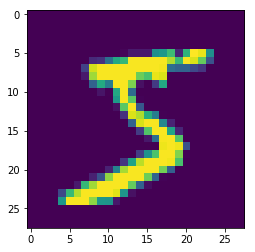

In [27]:
plt.imshow(X_train[0])

In [28]:
X_train = X_train/255
X_test = X_test/255

In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [30]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [31]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [32]:
autoencoder = Sequential([encoder, decoder])

In [33]:

autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [34]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 365us/sample - loss: 0.2554 - acc: 0.7921 - val_loss: 0.2215 - val_acc: 0.7929
Epoch 2/5
60000/60000 [==============================] - 23s 377us/sample - loss: 0.2012 - acc: 0.7952 - val_loss: 0.1742 - val_acc: 0.8012
Epoch 3/5
60000/60000 [==============================] - 28s 466us/sample - loss: 0.1652 - acc: 0.8012 - val_loss: 0.1533 - val_acc: 0.8014
Epoch 4/5
60000/60000 [==============================] - 28s 467us/sample - loss: 0.1502 - acc: 0.8037 - val_loss: 0.1442 - val_acc: 0.8037
Epoch 5/5
60000/60000 [==============================] - 26s 433us/sample - loss: 0.1426 - acc: 0.8052 - val_loss: 0.1388 - val_acc: 0.8061


Original image


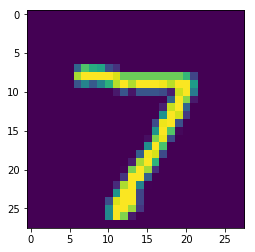

In [35]:
passed_images = autoencoder.predict(X_test[:10])
print("Original image")
plt.imshow(X_test[0])


Attempted Reconstruction


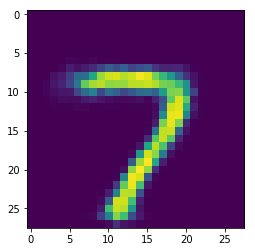

In [36]:
print("Attempted Reconstruction")
plt.imshow(passed_images[0])